## Analyse Master Catalog

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
master_loc = '/home/mike/repos/zoobot/data/decals/decals_master_catalog.csv'
df = pd.read_csv(master_loc)

/media/mike/Windows/linux_cache/miniconda37/envs/zoobot/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (109) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


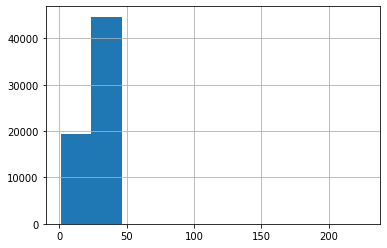

In [4]:
df['smooth-or-featured_total-votes'].hist()

In [6]:
# df['has_url'] = ~pd.isnull(df.iloc[:, 210])
# df['has_classifications'] = ~pd.isnull(df['smooth-or-featured_total-votes'])

In [8]:
# (df['has_url'] & ~df['has_classifications']).value_counts()

In [9]:
len(df)

209215

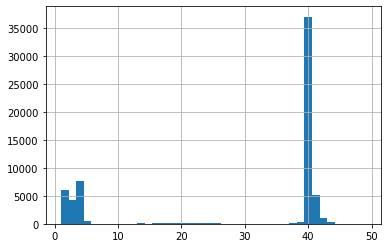

In [10]:
df[df['smooth-or-featured_total-votes'] < 50]['smooth-or-featured_total-votes'].hist(bins=40)

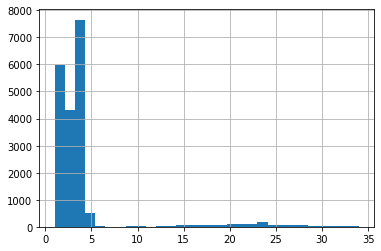

In [11]:
df[df['smooth-or-featured_total-votes'] < 35]['smooth-or-featured_total-votes'].hist(bins=30)

In [30]:
assert len(df) == len(df['iauname'].unique())

In [12]:
((df['smooth-or-featured_total-votes'] < 10) & (df['smooth-or-featured_total-votes'] > 2)).sum()

12514

In [13]:
(df['smooth-or-featured_total-votes'] > 10).sum()

45543

In [14]:
pd.isnull(df['smooth-or-featured_total-votes']).sum()

145154

In [15]:
(df['smooth-or-featured_featured-or-disk_fraction'] > 0.5) .sum()

19298

In [16]:
retired = df[df['smooth-or-featured_total-votes'] > 38]

In [17]:
very_featured = retired.sort_values('smooth-or-featured_featured-or-disk_fraction', ascending=False)['file_loc'][:8]

In [18]:
def show_examples(examples):
    fig, axes = plt.subplots(ncols=len(examples), figsize=(4 * len(examples), 4))
    for n, galaxy in enumerate(examples):
        im = Image.open(galaxy)
        axes[n].imshow(im)

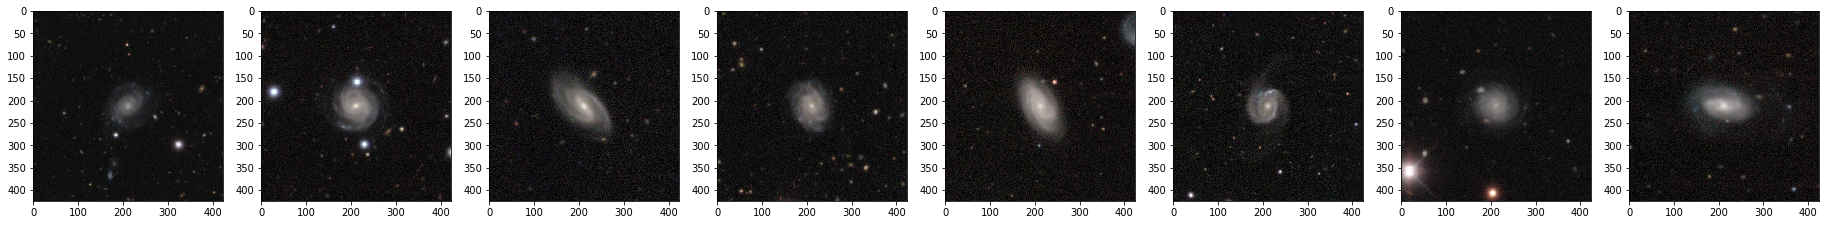

In [19]:
show_examples(very_featured)

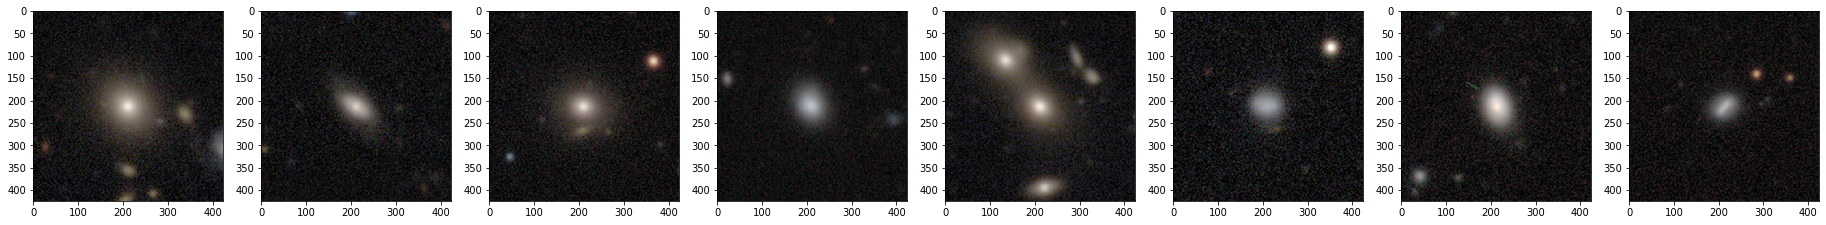

In [20]:
featured = retired[retired['smooth-or-featured_featured-or-disk_fraction'] > 0.5]
face_on = retired[retired['disk-edge-on_no_fraction'] > 0.5]
strong_bars = face_on.sort_values('bar_strong_fraction', ascending=False)['file_loc'][:8]
show_examples(strong_bars)

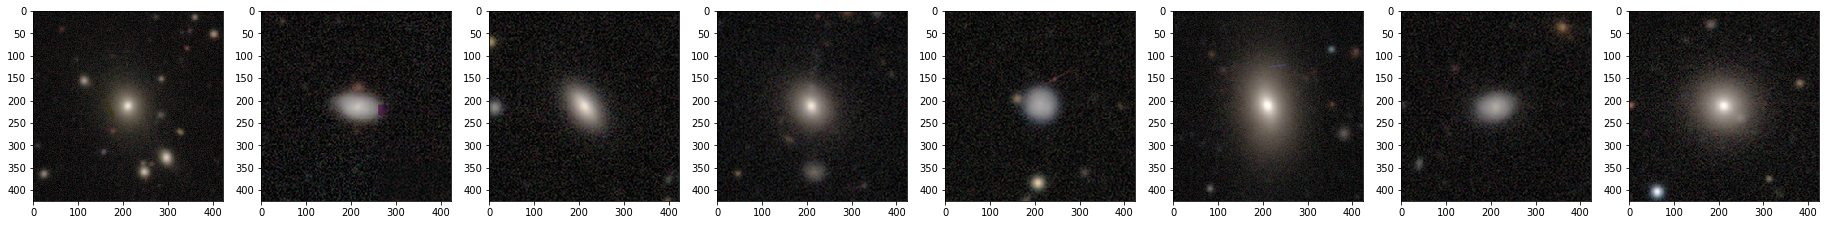

In [21]:
weak_bars = face_on.sort_values('bar_weak_fraction', ascending=False)['file_loc'][:8]
show_examples(weak_bars)

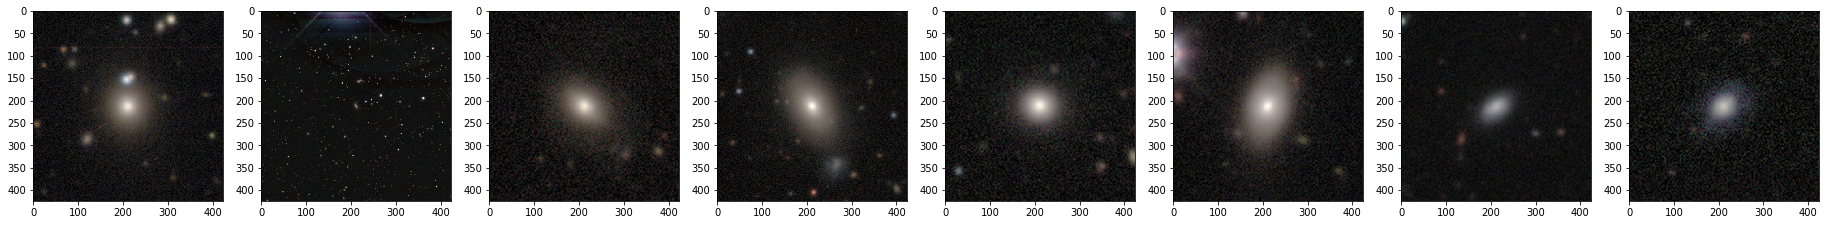

In [22]:
no_bars = face_on.sort_values('bar_no_fraction', ascending=False)['file_loc'][:8]
show_examples(no_bars)

/media/mike/Windows/linux_cache/miniconda37/envs/zoobot/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


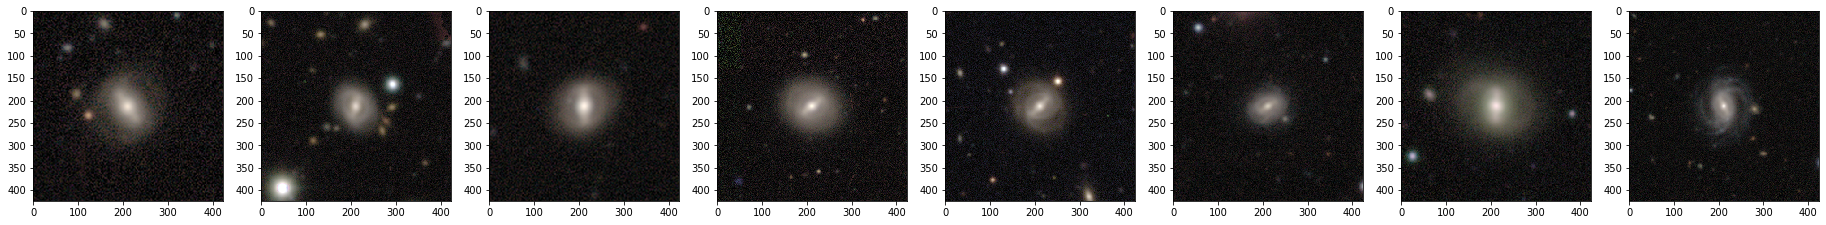

In [23]:
face_on['bar_any_fraction'] = df['bar_strong_fraction'] + df['bar_weak_fraction']
any_bars = face_on.sort_values('bar_any_fraction', ascending=False)['file_loc'][:8]
show_examples(any_bars)

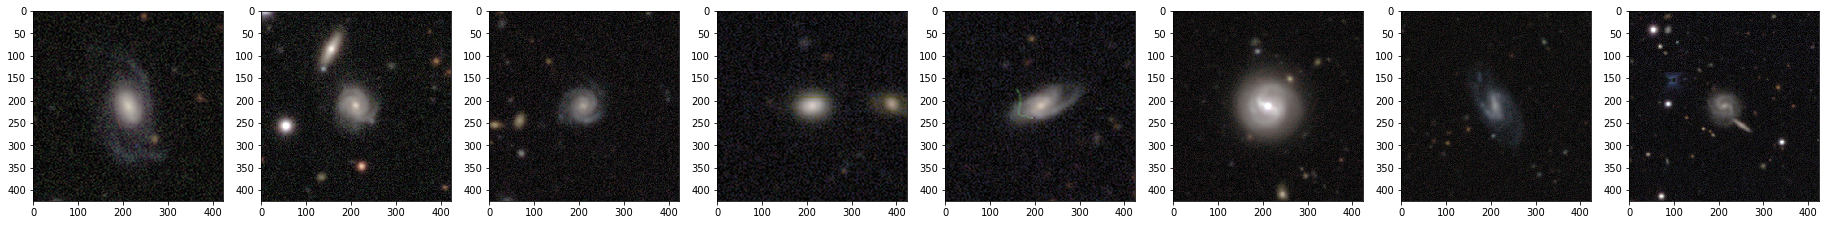

In [24]:
spiral = face_on.sort_values('has-spiral-arms_yes_fraction', ascending=False)['file_loc'][:8]
show_examples(spiral)

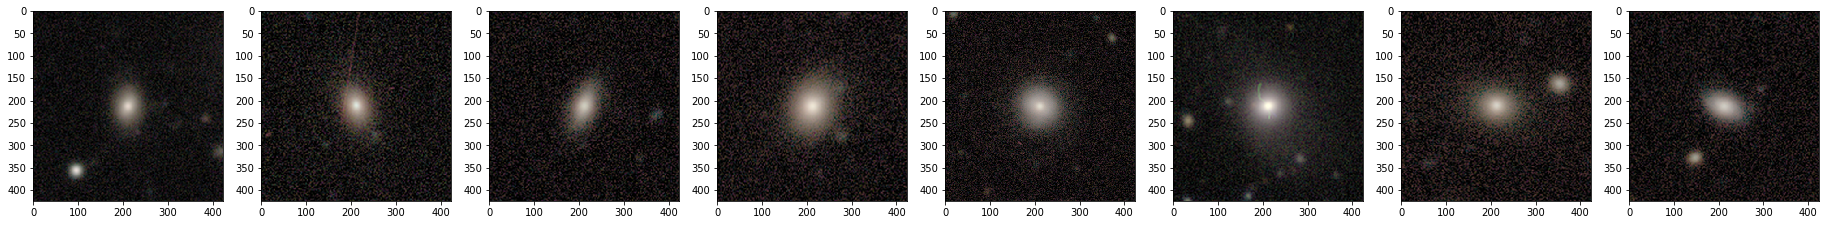

In [25]:
no_spiral = face_on.sort_values('has-spiral-arms_no_fraction', ascending=False)['file_loc'][:8]
show_examples(no_spiral)

## Pretty good apart from bars - needs strong+weak to get a good separate, as we saw vs. Nair when we launched

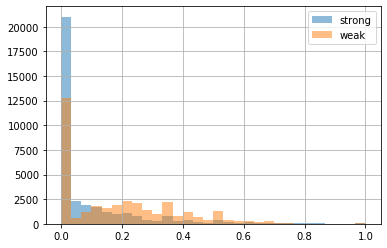

In [26]:
face_on['bar_strong_fraction'].hist(bins=30, alpha=0.5, label='strong')
face_on['bar_weak_fraction'].hist(bins=30, alpha=0.5, label='weak')
plt.legend()

### Sanity checks

In [27]:
df['bar_no_fraction'] + df['bar_strong_fraction'] + df['bar_weak_fraction'].value_counts()

0.000000         24245.6
0.025641             NaN
0.026316             NaN
0.027027             NaN
0.027778             NaN
                  ...   
209210.000000        NaN
209211.000000        NaN
209212.000000        NaN
209213.000000        NaN
209214.000000        NaN
Length: 209626, dtype: float64